In [1]:
import re
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from datetime import datetime

In [2]:
default_params = {
    'sep': ',',
    'low_memory': False,
    'error_bad_lines': True
}

req_train = pd.read_csv(filepath_or_buffer='data/requests_train.csv',
                        **default_params,
                        index_col=0)

req_test = pd.read_csv(filepath_or_buffer='data/requests_test.csv',
                       **default_params,
                       index_col=0)

idv_train = pd.read_csv(filepath_or_buffer='data/individuals_train.csv',
                        **default_params,
                        index_col=[0, 1])

idv_test = pd.read_csv(filepath_or_buffer='data/individuals_test.csv',
                       **default_params,
                       index_col=[0, 1])

print("\nRequest dataset\n")

print(req_train.shape)
print(req_train.dtypes)
display(req_train.head(5))

print("\nIndividuals dataset\n")

print(idv_train.shape)
print(idv_train.dtypes)
display(idv_train.head(5))


Request dataset

(238191, 23)
animal_presence                  object
answer_creation_date             object
child_situation                   int64
child_to_come                    object
district                          int64
granted_number_of_nights          int64
group_composition_id              int64
group_composition_label          object
group_creation_date              object
group_id                         object
group_main_requester_id          object
group_type                       object
housing_situation_id              int64
housing_situation_label          object
long_term_housing_request        object
number_of_underage                int64
request_backoffice_creator_id    object
request_creation_date            object
requester_type                   object
social_situation_id              object
town                             object
victim_of_violence               object
victim_of_violence_type          object
dtype: object


,animal_presence,answer_creation_date,child_situation,child_to_come,district,granted_number_of_nights,group_composition_id,group_composition_label,group_creation_date,group_id,...,housing_situation_label,long_term_housing_request,number_of_underage,request_backoffice_creator_id,request_creation_date,requester_type,social_situation_id,town,victim_of_violence,victim_of_violence_type
request_id,,,,,,,,,,,,,,,,,,,,,
130667d2964de43c511d0ead7ac66b33,f,2019-02-11 22:30:00,-1,NaN,85,1,10,man alone,2018-05-03 12:10:40.416,c62f692dcc3f31880dd3937369c6f9e1,...,other,NaN,-1,eecd6110b7e9157e6423428b22a28159,2019-02-11 22:30:00,third party,9a84febc47fedaf2c81d7c755e9edc85,NaN,f,NaN
b1cd62fcf24eebb0f685d5eaf55317a8,f,2019-02-12 09:00:00,-1,NaN,85,1,10,man alone,2019-03-07 12:11:08.545,cbb3ae0239a3ca9a0441831bde02aaa3,...,other,NaN,-1,eecd6110b7e9157e6423428b22a28159,2019-02-12 09:00:00,user,11f64f0547e855c5c59329b9edc63063,NaN,f,NaN
12cc0a18890bd4959fe42df3ae58838e,f,2019-02-01 21:00:00,-1,NaN,59,1,80,isolated child/underage,2019-03-13 12:54:15.887,a73d85877e940fd36ac23bb80ac7fbbe,...,street,NaN,-1,686d962128c7622aa79ed91da13f5c77,2019-02-01 21:00:00,user,898ab2883f410f4c6fb042ef16329fbb,NaN,f,NaN
ae2d5b4dc181d29e430132f145da1556,f,2019-02-25 15:12:05.037,-1,NaN,50,2,20,woman alone,2018-10-09 14:37:29.773,5f69b8b928f84ce1e673740acb854af2,...,NaN,NaN,-1,ec29519464c381a6630f4e480a0c000e,2019-02-25 15:12:05.037,user,3998c8e890ddc980527dd1af45dfa672,NaN,t,woman
d13a17ce36c832514fda2464e11c4a9f,f,2019-02-20 09:59:20.603,-1,NaN,93,2,60,group with child(ren),2018-10-02 10:47:36.931,df3a2364091c2aa9f90f2738f6b176f1,...,hotel paid by the emergency centre,NaN,-1,c8b5cc926b1d7212224a08baa9619518,2019-02-20 09:59:20.603,user,74a10d96eae43586bc3c46e89719b821,NaN,f,NaN



Individuals dataset

(384133, 14)
housing_situation_2_id            int64
housing_situation_2_label        object
birth_month                       int64
birth_year                        int64
childcare_center_supervision     object
disabled_worker_certification    object
gender                           object
individual_creation_date         object
individual_role                  object
individual_role_2_id              int64
individual_role_2_label          object
marital_status_id                 int64
marital_status_label             object
pregnancy                        object
dtype: object


,,housing_situation_2_id,housing_situation_2_label,birth_month,birth_year,childcare_center_supervision,disabled_worker_certification,gender,individual_creation_date,individual_role,individual_role_2_id,individual_role_2_label,marital_status_id,marital_status_label,pregnancy
request_id,individual_id,,,,,,,,,,,,,,
130667d2964de43c511d0ead7ac66b33,b24a8cfaaf3663bac45ca3bcd24f0b36,20,on the street,5,1977,NaN,NaN,male,2018-01-29,isolated person,30,isolated adult,10,single person,f
b1cd62fcf24eebb0f685d5eaf55317a8,eef783d1bda82661a751c12c34aff8c2,20,on the street,5,1980,NaN,NaN,male,2019-03-07,NaN,30,isolated adult,-1,NaN,f
12cc0a18890bd4959fe42df3ae58838e,927b6fa58d6be263c411332835b11fec,20,on the street,1,2003,NaN,NaN,male,2019-03-13,NaN,10,isolated underage/child,-1,NaN,f
ae2d5b4dc181d29e430132f145da1556,94181d5cf4a56cc84d12677df84e2e03,20,on the street,7,1986,NaN,NaN,female,2018-10-09,NaN,30,isolated adult,-1,NaN,f
d13a17ce36c832514fda2464e11c4a9f,e79d2e3f9ace50049f1796c098008c13,35,hotel paid by the emergency structure,9,1980,NaN,NaN,female,2017-06-22,husband/spouse,1,partner,-1,NaN,f


In [3]:
def clean_boolean(df, col_names):
    # Replaces 't', 'f' booleans by 1 and -1
    df.loc[:, col_names] = df[col_names].fillna(0).replace({'f': -1, 't':1})
    
def labels_to_boolcol(df, col_names, drop_col = True):
    # Transform signle columns of labels to multiple boolean columns for each labels
    for col_name in col_names:
        for label in df[col_name].unique():
            if isinstance(label, str):
                df['_'.join((col_name, label.replace(' ', '_').replace('/', '_')))] = (df[col_name] == label).astype(int)
            else:
                df['_'.join((col_name, str(label)))] = (df[col_name] == label).astype(int)
        if drop_col:
            df.drop(col_name, axis=1, inplace=True)

def req_preparation(df):
    # Prepare requests dataset
    boolean_col_names = ["animal_presence", "child_to_come", "long_term_housing_request", "victim_of_violence"]
    clean_boolean(df, boolean_col_names)
    
    labels_to_boolcol(df, ["requester_type", "victim_of_violence_type"])

def idv_preparation(df):
    # Prepare individuals dataset
    boolean_col_names = ["childcare_center_supervision", "disabled_worker_certification", "pregnancy"]
    clean_boolean(df, boolean_col_names)
    
    labels_to_boolcol(df, ["gender", "individual_role_2_label", "marital_status_label"])

In [4]:
req_preparation(req_train)
req_preparation(req_test)

idv_preparation(idv_train)
idv_preparation(idv_test)

display(req_train.sample(5))
display(idv_train.sample(5))

,animal_presence,answer_creation_date,child_situation,child_to_come,district,granted_number_of_nights,group_composition_id,group_composition_label,group_creation_date,group_id,...,requester_type_third_party,requester_type_user,requester_type_social_patrol,victim_of_violence_type_nan,victim_of_violence_type_woman,victim_of_violence_type_woman_victim_of_domestic_violence,victim_of_violence_type_man,victim_of_violence_type_family,victim_of_violence_type_man_victim_of_domestic_violence,victim_of_violence_type_child
request_id,,,,,,,,,,,,,,,,,,,,,
221b76449d97e1265801d6f334d17827,-1,2019-03-06 16:02:25.266,10,-1,94,0,100,couple with child(ren),2018-09-11 10:34:02.037,ea7979226c4e89b1bc017e2e0ff951be,...,0,1,0,0,0,0,0,0,0,0
4767394e0a098b6f537eca0437370e13,-1,2019-02-12 09:00:00,-1,0,315670,1,10,man alone,2018-02-20 13:03:46.730,2edcd86ac0c2896dbc079e03f2902a65,...,0,1,0,0,0,0,0,0,0,0
4824631b67597973f0bc47ce162c7cb4,-1,2019-03-11 12:28:47.158,10,-1,95,2,40,single mother with child(ren),2018-09-28 08:37:16.036,1e13c225d0b053f5b91116f554616649,...,0,1,0,0,0,0,0,0,0,0
c39345ef785a91bbfb7de3b1679cc1c8,-1,2019-01-13 10:33:00.167,-1,0,68,0,10,man alone,2018-09-06 09:20:08.173,fab53e06107e4931177609a49f955961,...,0,1,0,0,0,0,0,0,0,0
aee92c9a250c8232753e85fd6db5f055,-1,2019-02-05 10:23:56.989,-1,0,69,3,30,couple without whildren,2019-02-04 10:56:17.439,ba6fd10b5b3f289acfd14e9dffb80e5b,...,0,1,0,0,0,0,0,0,0,0


,,housing_situation_2_id,housing_situation_2_label,birth_month,birth_year,childcare_center_supervision,disabled_worker_certification,individual_creation_date,individual_role,individual_role_2_id,marital_status_id,...,individual_role_2_label_nan,marital_status_label_single_person,marital_status_label_nan,marital_status_label_married,marital_status_label_separated,marital_status_label_cohabitation,marital_status_label_widowed,marital_status_label_marital_relationship,marital_status_label_divorced,marital_status_label_civil_partner
request_id,individual_id,,,,,,,,,,,,,,,,,,,,,
9b7e876fb2ccf26f2d95ac52570abb15,05ebe8a2cefad7e45a35e01d881a14f3,35,hotel paid by the emergency structure,5,1991,0,0,2018-12-05,NaN,40,10,...,0,1,0,0,0,0,0,0,0,0
38394cf51cf11857434142e3f35b23ae,4c6c8368c4d04896512e1daf48223020,20,on the street,6,2016,0,0,2018-06-13,NaN,70,10,...,0,1,0,0,0,0,0,0,0,0
95fcddc848356bd5861903581e266f70,70f7fe369bd55e0ef8de5d7ccbd1e799,23,emergency accomodation centre for asylum seeker,5,2010,0,0,2018-02-09,NaN,70,-1,...,0,0,0,0,0,0,0,0,0,0
cdac9fdf53eb608e6745b88bcc9e5c67,dce92daeaf379a41483b609477653815,20,on the street,1,1975,0,0,2019-01-28,NaN,60,-1,...,0,0,0,0,0,0,0,0,0,0
8c074b7aab03ecd2b97ad72de8bcdd42,bd460edee677a0504033cb9d22e55115,20,on the street,1,1986,0,0,2019-01-07,NaN,30,20,...,0,0,0,1,0,0,0,0,0,0


In [5]:
def prepare_features(req_df, idv_df, scale=True, numerical_only=True, visualization=False):
    # Extract informations from both dataset and compute some metrics
    
    df = req_df
    
    # Compute group size
    group_sizes = idv_df.iloc[:, 0].groupby("request_id").agg(group_size = 'size')
    
    df = df.join(group_sizes)
    
    # Standardize date and time of the request creation
    df['request_datetime'] = df['request_creation_date'].apply(lambda x: x.split('.')[0])
    df['request_datetime'] = pd.to_datetime(df['request_datetime'], format='%Y-%m-%d %H:%M:%S')
    df['request_date'] = df['request_datetime'].dt.date
    df['request_day_of_week'] = df['request_datetime'].dt.dayofweek
    df['request_hour'] = df['request_datetime'].dt.hour
    
    if visualization:
        df['request_day_of_month'] = df['request_datetime'].dt.day
        df['request_minutes'] = df['request_datetime'].dt.hour * 60 + df['request_datetime'].dt.minute
        
        # Standardize date and time of the answer creation - sometime different from request creation
        df['answer_datetime'] = df['answer_creation_date'].apply(lambda x: x.split('.')[0])
        df['answer_datetime'] = pd.to_datetime(df['answer_datetime'], format='%Y-%m-%d %H:%M:%S')
        df['answer_date'] = df['answer_datetime'].dt.date
        df['answer_hour'] = df['answer_datetime'].dt.hour
        df['answer_minutes'] = df['answer_datetime'].dt.hour * 60 + df['answer_datetime'].dt.minute
    
    # Compute metrics about the age of the group making the request
    idv_df = idv_df.join(df['request_datetime'])
    
    idv_df['birth_month'] = idv_df['birth_year'].astype(str) + idv_df['birth_month'].astype(str)
    idv_df['birth_month'] = pd.to_datetime(idv_df['birth_month'], format='%Y%m', errors='coerce')

    no_birth = idv_df['birth_month'].isnull() # few birth date informations are missing

    idv_df["age_in_month"] = pd.NaT
    age_in_ns = (idv_df[~no_birth]['request_datetime'] - idv_df[~no_birth]['birth_month'])
    idv_df.loc[~no_birth, "age_in_month"] = age_in_ns.astype('timedelta64[M]')
    
    incoherent_age = no_birth | (idv_df["age_in_month"] < 0) | (idv_df["age_in_month"] > 120*12)
    
    idv_df.loc[incoherent_age, "age_in_month"] = idv_df.loc[~incoherent_age, "age_in_month"].mean()
    
    idv_df["age_in_month"] = idv_df["age_in_month"].astype('int64')
    
    if visualization:
        df = df.join(
            idv_df["age_in_month"].groupby("request_id").agg(
                mean_age_in_month= 'mean',
                min_age_in_month= 'min',
                max_age_in_month= 'max'
            ),
            on="request_id"
        )
    
        df["mean_age"] = (df["mean_age_in_month"] / 12).astype('int64')
        df["min_age"] = (df["min_age_in_month"] / 12).astype('int64')
        df["max_age"] = (df["max_age_in_month"] / 12).astype('int64')
        
    else:
        df = df.join(
            idv_df["age_in_month"].groupby("request_id").agg(
                mean_age_in_month= 'mean'
            ),
            on="request_id"
        )
    
        df["mean_age"] = (df["mean_age_in_month"] / 12).astype('int64')
        df = df.drop("mean_age_in_month", axis=1)
        
    
    # Count labels
    labels_col_prefixes = ["gender"]
    
    if visualization:
        labels_col_prefixes += ["individual_role_2_label", "childcare_center_supervision", "disabled_worker_certification"]
    
    for label_col_prefix in labels_col_prefixes:
        for col in idv_df.columns[idv_df.columns.map(lambda x: label_col_prefix in x)]:
            df = df.join(
                idv_df[col].apply(lambda x: int(x==1)).groupby("request_id").agg(**{col + "_count": 'sum'}),
                on="request_id"
            )
    
    if visualization:
        # Specify if a town is registered
        df["is_in_town"] = df["town"].notnull().astype(int)
    
    
    # Day of week & Districts as boolean
    labels_cols = ["request_day_of_week"]
    
    if visualization:
        # District is important but turning into k columns of booleans increases too much the dimention
        labels_cols += ["district"]
    
    labels_to_boolcol(df, labels_cols, drop_col=False)
    
    # Keep numerical features only
    if numerical_only:
        df = df.loc[:, (df.dtypes == 'int64') | (df.dtypes == 'int32') | (df.dtypes == 'float64') | (df.dtypes == 'float32')]
    
    return df

# Visualization

In [77]:
df = prepare_features(req_train, idv_train, numerical_only=False, visualization=True)
df

,animal_presence,answer_creation_date,child_situation,child_to_come,district,granted_number_of_nights,group_composition_id,group_composition_label,group_creation_date,group_id,...,district_19,district_98,district_314550,district_101,district_97,district_74,district_21,district_315770,district_48,district_315842
request_id,,,,,,,,,,,,,,,,,,,,,
130667d2964de43c511d0ead7ac66b33,-1,2019-02-11 22:30:00,-1,0,85,1,10,man alone,2018-05-03 12:10:40.416,c62f692dcc3f31880dd3937369c6f9e1,...,0,0,0,0,0,0,0,0,0,0
b1cd62fcf24eebb0f685d5eaf55317a8,-1,2019-02-12 09:00:00,-1,0,85,1,10,man alone,2019-03-07 12:11:08.545,cbb3ae0239a3ca9a0441831bde02aaa3,...,0,0,0,0,0,0,0,0,0,0
12cc0a18890bd4959fe42df3ae58838e,-1,2019-02-01 21:00:00,-1,0,59,1,80,isolated child/underage,2019-03-13 12:54:15.887,a73d85877e940fd36ac23bb80ac7fbbe,...,0,0,0,0,0,0,0,0,0,0
ae2d5b4dc181d29e430132f145da1556,-1,2019-02-25 15:12:05.037,-1,0,50,2,20,woman alone,2018-10-09 14:37:29.773,5f69b8b928f84ce1e673740acb854af2,...,0,0,0,0,0,0,0,0,0,0
d13a17ce36c832514fda2464e11c4a9f,-1,2019-02-20 09:59:20.603,-1,0,93,2,60,group with child(ren),2018-10-02 10:47:36.931,df3a2364091c2aa9f90f2738f6b176f1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
df6c41d5cf89b4690de199c718347bb6,-1,2019-01-30 11:18:26.561,-1,-1,45,1,10,man alone,2019-01-29 16:27:19.789,758ea234b7b4f7c73fbd28d957960a84,...,0,0,0,0,0,0,0,0,0,0
30ad9a99ddf6c2ab4c839bd3b251321c,-1,2019-01-31 17:07:54.952,-1,0,38,1,10,man alone,2019-01-31 17:10:05.530,dd507a595e791befd71892df178d5a9f,...,0,0,0,0,0,0,0,0,0,0
f1c688b7955bd0c719265e6eae9a2944,-1,2019-01-07 14:09:20.226,-1,0,93,2,40,single mother with child(ren),2018-10-30 15:49:48.164,7e1889d98b85c421904c8ad65e8fa2b3,...,0,0,0,0,0,0,0,0,0,0


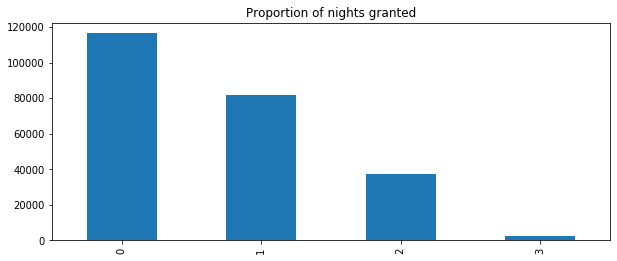

In [78]:
df["granted_number_of_nights"].value_counts().plot(kind='bar', figsize=(10, 4), title="Proportion of nights granted");

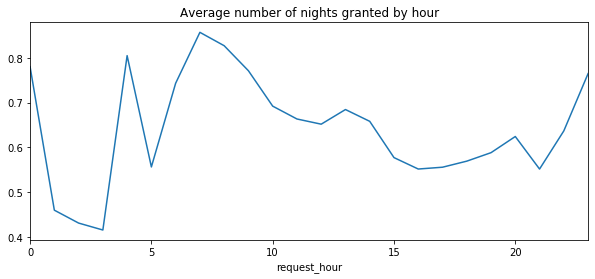

In [79]:
df.groupby("request_hour")["granted_number_of_nights"].mean().plot(kind='line', figsize=(10, 4), title="Average number of nights granted by hour");

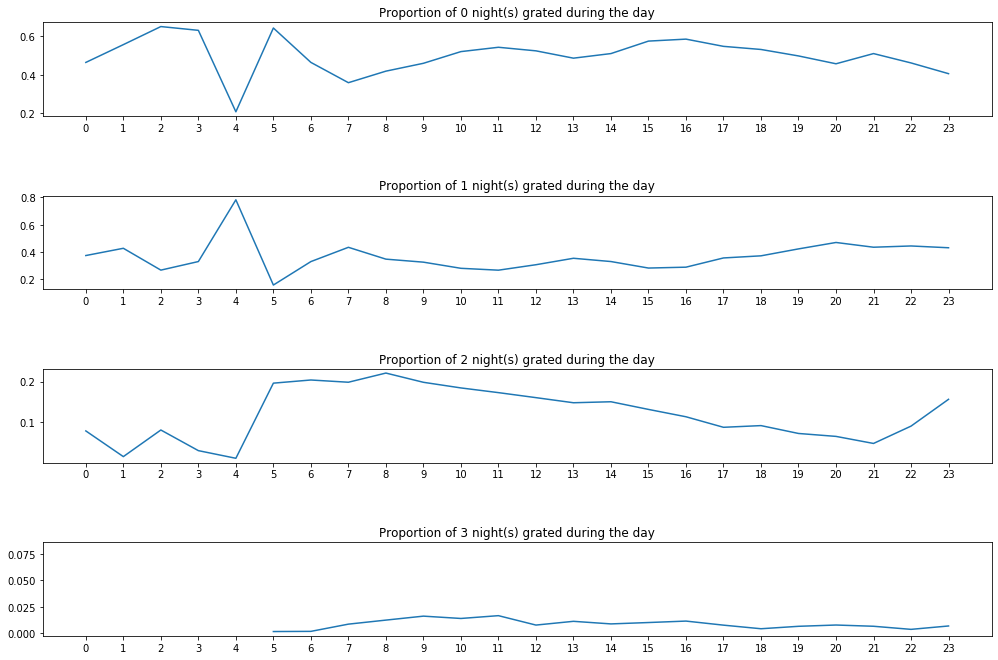

In [80]:
fig, ax = plt.subplots(4, 1)

fig.tight_layout()

fig.set_figheight(10)
fig.set_figwidth(15)

count_request_by_hour = df.groupby("request_hour")["granted_number_of_nights"].count()

for i in range(4):
    count = df[df["granted_number_of_nights"] == i].groupby("request_hour")["granted_number_of_nights"].count()/count_request_by_hour
    ax[i].plot(
        count.index.astype(str),
        count
    )
    ax[i].set_title("Proportion of {} night(s) grated during the day".format(i) , fontsize=12)
   
plt.show()

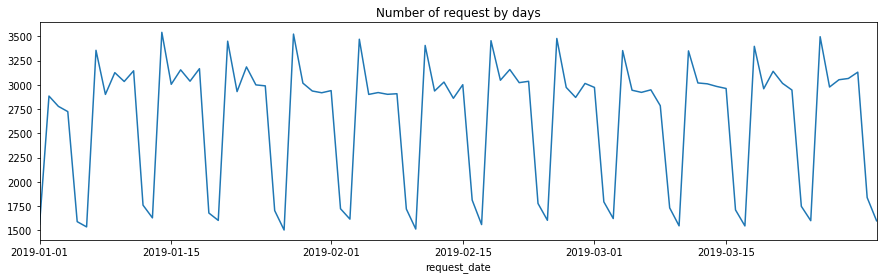

In [81]:
df.groupby("request_date")["granted_number_of_nights"].count().plot(kind='line', figsize=(15, 4), title="Number of request by days");

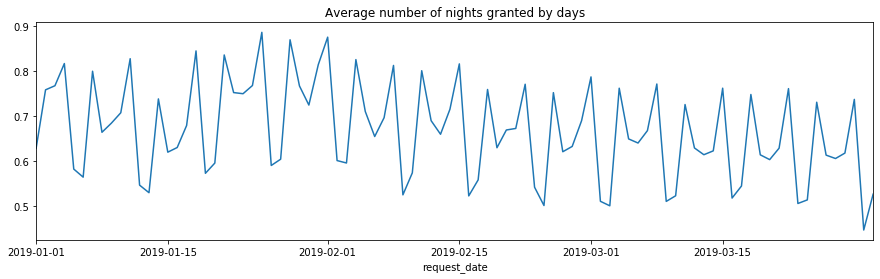

In [82]:
df.groupby("request_date")["granted_number_of_nights"].mean().plot(kind='line', figsize=(15, 4), title="Average number of nights granted by days");

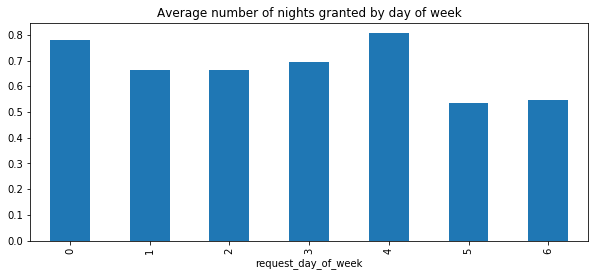

In [83]:
df.groupby("request_day_of_week")["granted_number_of_nights"].mean().plot(kind='bar', figsize=(10, 4), title="Average number of nights granted by day of week");

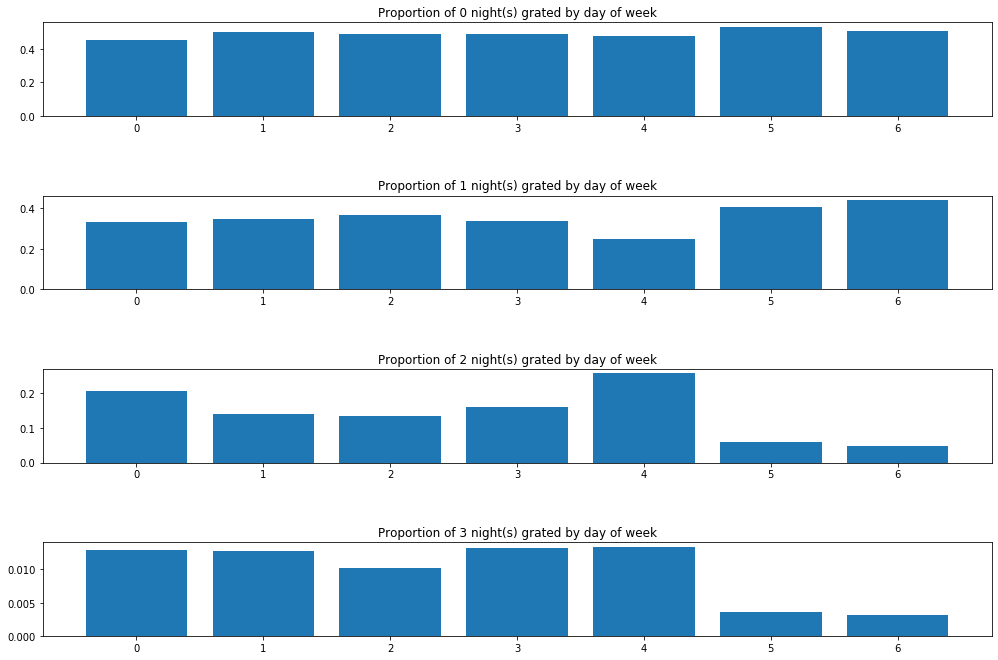

In [84]:
fig, ax = plt.subplots(4, 1)

fig.tight_layout()

fig.set_figheight(10)
fig.set_figwidth(15)

count_request_by_day = df.groupby("request_day_of_week")["granted_number_of_nights"].count()

for i in range(4):
    prop = df[df["granted_number_of_nights"] == i].groupby("request_day_of_week")["granted_number_of_nights"].count()/count_request_by_day
    ax[i].bar(
        x=prop.index.astype(str),
        height=prop
    )
    ax[i].set_title("Proportion of {} night(s) grated by day of week".format(i) , fontsize=12)
   
plt.show()

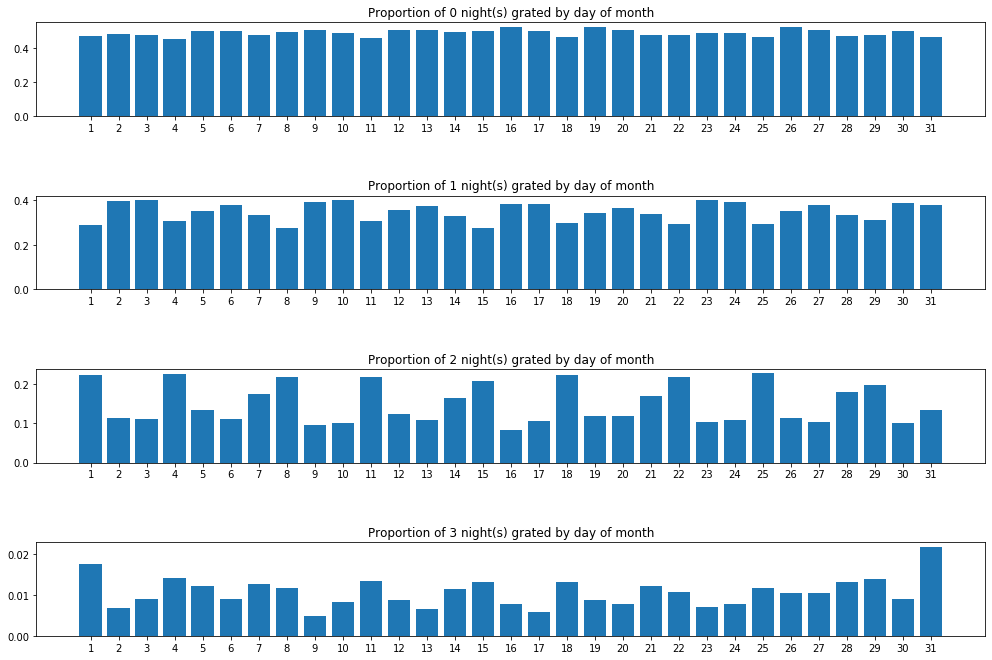

In [85]:
fig, ax = plt.subplots(4, 1)

fig.tight_layout()

fig.set_figheight(10)
fig.set_figwidth(15)

count_request_by_day = df.groupby("request_day_of_month")["granted_number_of_nights"].count()

for i in range(4):
    prop = df[df["granted_number_of_nights"] == i].groupby("request_day_of_month")["granted_number_of_nights"].count()/count_request_by_day
    ax[i].bar(
        x=prop.index.astype(str),
        height=prop
    )
    ax[i].set_title("Proportion of {} night(s) grated by day of month".format(i) , fontsize=12)
   
plt.show()

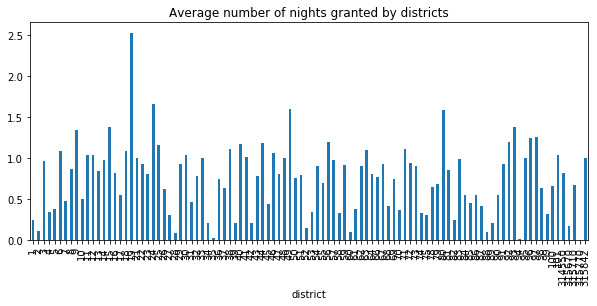

In [86]:
df.groupby("district")["granted_number_of_nights"].mean().\
    plot(kind='bar', figsize=(10, 4), title="Average number of nights granted by districts");

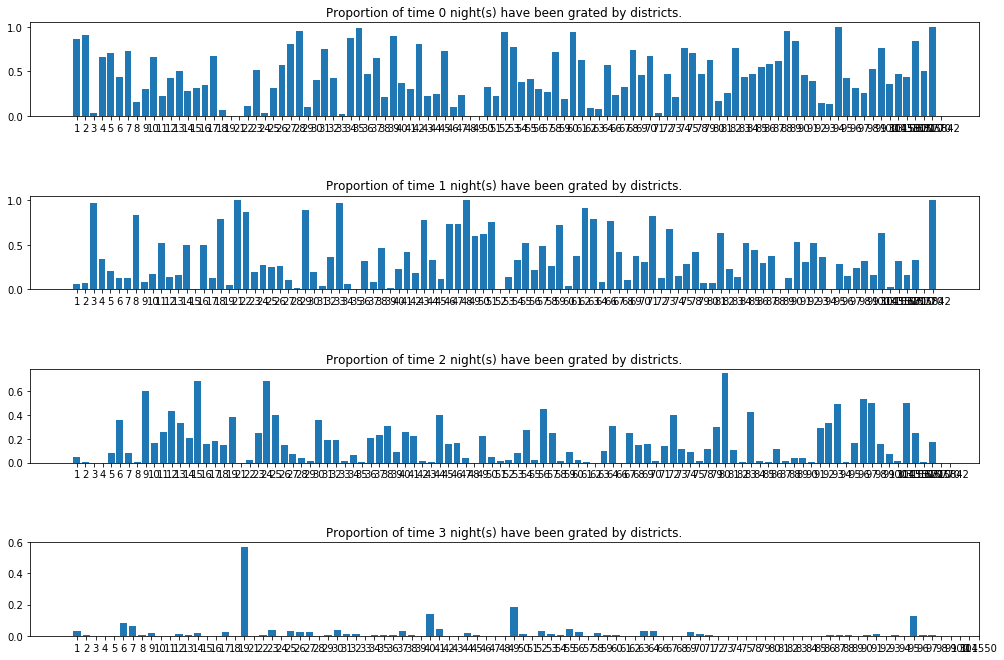

In [87]:
fig, ax = plt.subplots(4, 1)

fig.tight_layout()

fig.set_figheight(10)
fig.set_figwidth(15)

count_request_by_district = df.groupby("district")["granted_number_of_nights"].count()

for i in range(4):
    prop = df[df["granted_number_of_nights"] == i].groupby("district")["granted_number_of_nights"].count()/count_request_by_district
    ax[i].bar(
        x=prop.index.astype(str),
        height=prop
    )
    ax[i].set_title("Proportion of time {} night(s) have been grated by districts.".format(i) , fontsize=12)
   
plt.show()

In [88]:
print("Number of different towns: {}".format(df["town"].unique().size))

count = df["is_in_town"].value_counts()

print()
print("Number of requests in town: {}".format(count[1]))
print("Number of requests not in town: {}".format(count[0]))

means = df.groupby("is_in_town")["granted_number_of_nights"].mean()

print()
print("Average number of nights granted for requests in town: {}".format(means[1]))
print("Average number of nights granted for requests not in town: {}".format(means[0]))

print()
for i in range(4):
    print("\n{} Night(s)".format(i))
    prop = df[df["granted_number_of_nights"] == i].groupby("is_in_town")["granted_number_of_nights"].count() / count
    print("Proportion of {} night(s) granted for requests in town: {}".format(i, prop[1]))
    print("Proportion of {} night(s) granted for requests not in town: {}".format(i, prop[0]))

Number of different towns: 1117

Number of requests in town: 78232
Number of requests not in town: 159959

Average number of nights granted for requests in town: 0.6735479087841293
Average number of nights granted for requests not in town: 0.6968535687269863


0 Night(s)
Proportion of 0 night(s) granted for requests in town: 0.49993608753451274
Proportion of 0 night(s) granted for requests not in town: 0.48406779237179526

1 Night(s)
Proportion of 1 night(s) granted for requests in town: 0.33865937212393904
Proportion of 1 night(s) granted for requests not in town: 0.3452697253671253

2 Night(s)
Proportion of 2 night(s) granted for requests in town: 0.14932508436445444
Proportion of 2 night(s) granted for requests not in town: 0.16040360342337723

3 Night(s)
Proportion of 3 night(s) granted for requests in town: 0.012079455977093772
Proportion of 3 night(s) granted for requests not in town: 0.010258878837702162


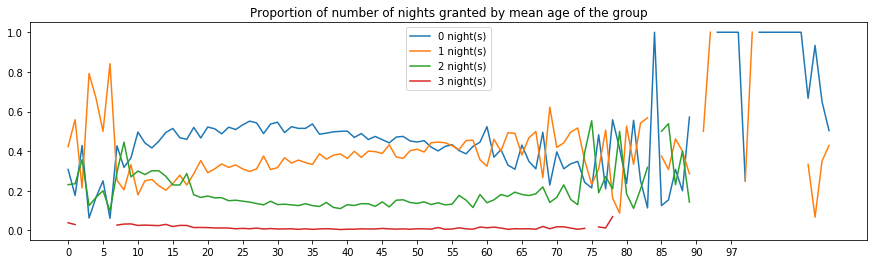

In [89]:
plt.figure(figsize=(15, 4))

count_request_by_min_age = df.groupby("mean_age")["granted_number_of_nights"].count()
legends = []

for i in range(4):
    prop = df[df["granted_number_of_nights"] == i].groupby("mean_age")["granted_number_of_nights"].count()/count_request_by_min_age
    plt.plot(
        prop.index.astype(str),
        prop,
        label=str(i)
    )
    legends.append("{} night(s)".format(i))

plt.title("Proportion of number of nights granted by mean age of the group")
plt.legend(legends)    
plt.xticks(np.arange(0, 100, 5))
   
plt.show()

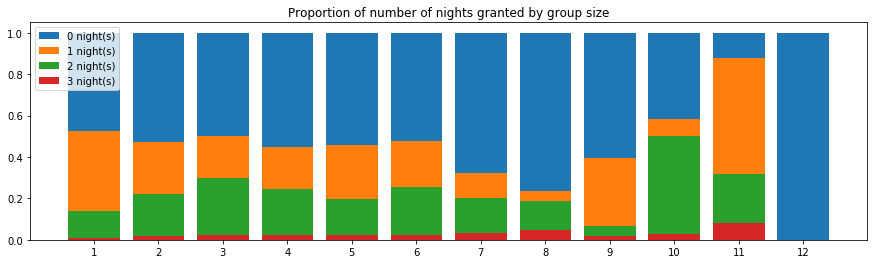

In [20]:
plt.figure(figsize=(15, 4))

count_request_by_min_age = df.groupby("group_size")["granted_number_of_nights"].count()
legends = []

for i in range(4):
    prop = df[df["granted_number_of_nights"] >= i].groupby("group_size")["granted_number_of_nights"].count()/count_request_by_min_age
    plt.bar(
        prop.index.astype(str),
        prop,
        label=str(i)
    )
    legends.append("{} night(s)".format(i))

plt.title("Proportion of number of nights granted by group size")
plt.legend(legends)
   
plt.show()

We can see that a lot of factors have an invluence on the number of nights granted. It is then important to choose the right ones. Indeed we can not use every features we computed to avoid the dimentionality to explode and to avoid overfitting. 

# Classification

In [6]:
from sklearn.metrics import log_loss
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import cross_val_score

In [7]:
# Define the test scorer
def competition_scorer(y_true, y_pred):
    return log_loss(y_true, y_pred, sample_weight=10**y_true)

def scorer(estimator, X, y):
    y_pred = estimator.predict_proba(X)
    return competition_scorer(y, y_pred)

def test_model(model, X_train, y_train, X_test, y_test, sample_weight=None):
    model.fit(X_train, y_train, sample_weight=sample_weight)
    return scorer(model, X_test, y_test)

In [98]:
# Prepare training set
train_set = prepare_features(req_train, idv_train)

train_target = train_set["granted_number_of_nights"]
train_features = train_set.drop("granted_number_of_nights", axis=1)

# Prepare testing set
test_set = prepare_features(req_test, idv_test)

test_target = test_set["granted_number_of_nights"]
test_features = test_set.drop("granted_number_of_nights", axis=1)

# Some features might be present only in the test or train dataset
train_features = train_features.loc[:, [col in test_features.columns for col in train_features.columns]]
test_features = test_features.loc[:, [col in train_features.columns for col in test_features.columns]]

print("Number of features: {}".format(train_features.shape[1]))

Number of features: 34


In [24]:
estimators = {}

estimators["random_forest"] = RandomForestClassifier(n_estimators=100, max_features=0.35, max_depth=5, min_samples_leaf=5)
estimators["gradient_boosting"] = GradientBoostingClassifier(learning_rate=0.1, subsample=0.8, max_features=0.9)
estimators["logistic_regression"] = LogisticRegression(l1_ratio=0.3, penalty='elasticnet', solver='saga', multi_class='multinomial')

cv_results = {}

for key in estimators:
    cv_results[key] = cross_val_score(
        estimator = estimators[key],
        X = train_features,
        y = train_target,
        scoring = scorer,
        cv = 5,
        fit_params = {"sample_weight": 10**train_target},
        n_jobs = -1
    )
    print(
        "[{estimator_name}] - mean score: {mean_score}, scores variance: {scores_variance}".format(
            estimator_name = key,
            mean_score = cv_results[key].mean(),
            scores_variance = cv_results[key].var()
        )
    )

[random_forest] - mean score: 0.81041220345935, scores variance: 0.00013383867727555712
[gradient_boosting] - mean score: 0.6400523136321701, scores variance: 0.0001715107865118371
[logistic_regression] - mean score: 1.3883826429559518, scores variance: 1.208443798553536e-05


After different tests, it apears that linear models doesn't perform well on the dataset. The models that performs the best seems to be the random forest and the gradient boosting classifier. We will then find the best hyper parameters for these two models.

# Hyper-parameters selection

In [25]:
from sklearn.model_selection import GridSearchCV

In [26]:
# Choose hyper parameters for Random Forest

rf = RandomForestClassifier()

gcv_results_rf = GridSearchCV(
    estimator = rf,
    param_grid = {
        "n_estimators": [100, 200],
        "max_features": [0.7, 0.8],
        "max_depth": [8, 10, 12],
        "min_samples_leaf": [20, 30, 40, 50]
    },
    scoring = scorer,
    cv = 5,
    refit = False,
    n_jobs = -1
).fit(train_features, train_target, sample_weight = 10**train_target)

In [27]:
for params, score in zip(gcv_results_rf.cv_results_['params'], gcv_results_rf.cv_results_['mean_test_score']):
        print(params)
        print(score)

{'max_depth': 8, 'max_features': 0.7, 'min_samples_leaf': 20, 'n_estimators': 100}
0.6608249094354868
{'max_depth': 8, 'max_features': 0.7, 'min_samples_leaf': 20, 'n_estimators': 200}
0.6590436443540977
{'max_depth': 8, 'max_features': 0.7, 'min_samples_leaf': 30, 'n_estimators': 100}
0.6608085065075414
{'max_depth': 8, 'max_features': 0.7, 'min_samples_leaf': 30, 'n_estimators': 200}
0.6583420858565443
{'max_depth': 8, 'max_features': 0.7, 'min_samples_leaf': 40, 'n_estimators': 100}
0.6586418643062312
{'max_depth': 8, 'max_features': 0.7, 'min_samples_leaf': 40, 'n_estimators': 200}
0.6592850836169952
{'max_depth': 8, 'max_features': 0.7, 'min_samples_leaf': 50, 'n_estimators': 100}
0.660199420329612
{'max_depth': 8, 'max_features': 0.7, 'min_samples_leaf': 50, 'n_estimators': 200}
0.6584826370032631
{'max_depth': 8, 'max_features': 0.8, 'min_samples_leaf': 20, 'n_estimators': 100}
0.6543885208767476
{'max_depth': 8, 'max_features': 0.8, 'min_samples_leaf': 20, 'n_estimators': 200}


In [28]:
# Choose hyper parameters for G-Boost

g_boost= GradientBoostingClassifier()

gcv_results_gboost = GridSearchCV(
    estimator = g_boost,
    param_grid = {
        "learning_rate": [0.2, 0.3, 0.4],
        "max_features": [0.8, 0.9, 0.99],
        "subsample": [0.8, 0.9, 0.99]
    },
    scoring = scorer,
    cv = 5,
    refit = False,
    n_jobs = -1
).fit(train_features, train_target, sample_weight = 10**train_target)

In [29]:
for params, score in zip(gcv_results_gboost.cv_results_['params'], gcv_results_gboost.cv_results_['mean_test_score']):
        print(params)
        print(score)

{'learning_rate': 0.2, 'max_features': 0.8, 'subsample': 0.8}
0.599990362795251
{'learning_rate': 0.2, 'max_features': 0.8, 'subsample': 0.9}
0.598643195533319
{'learning_rate': 0.2, 'max_features': 0.8, 'subsample': 0.99}
0.5975497707017708
{'learning_rate': 0.2, 'max_features': 0.9, 'subsample': 0.8}
0.5983718483476882
{'learning_rate': 0.2, 'max_features': 0.9, 'subsample': 0.9}
0.5973629201698667
{'learning_rate': 0.2, 'max_features': 0.9, 'subsample': 0.99}
0.5960160430587792
{'learning_rate': 0.2, 'max_features': 0.99, 'subsample': 0.8}
0.6038287262149727
{'learning_rate': 0.2, 'max_features': 0.99, 'subsample': 0.9}
0.5966787720849974
{'learning_rate': 0.2, 'max_features': 0.99, 'subsample': 0.99}
0.5950807539386817
{'learning_rate': 0.3, 'max_features': 0.8, 'subsample': 0.8}
0.586225338094293
{'learning_rate': 0.3, 'max_features': 0.8, 'subsample': 0.9}
0.5805444391019094
{'learning_rate': 0.3, 'max_features': 0.8, 'subsample': 0.99}
0.5836607509720335
{'learning_rate': 0.3, '

# Apply model on test set

Based on the grid search we can choose the right hyper parameters for both models, and finally apply them on the test data set.

In [99]:
# Apply Random Forest

rf = RandomForestClassifier(max_depth=12, max_features=0.8, min_samples_leaf=50, n_estimators=100)

test_model(rf, train_features, train_target, test_features, test_target, sample_weight = 10**train_target)

0.5967452357524017

In [34]:
# Apply G-Boost

g_boost = GradientBoostingClassifier(learning_rate=0.3, max_features=0.9)

test_model(g_boost, train_features, train_target, test_features, test_target, sample_weight = 10**train_target)

0.6050426478245983

# Tests MLP

In [8]:
# Prepare training set
train_set = prepare_features(req_train, idv_train)

train_target = train_set["granted_number_of_nights"]
train_features = train_set.drop("granted_number_of_nights", axis=1)

# Prepare testing set
test_set = prepare_features(req_test, idv_test)

test_target = test_set["granted_number_of_nights"]
test_features = test_set.drop("granted_number_of_nights", axis=1)

# Some features might be present only in the test or train dataset
train_features = train_features.loc[:, [col in test_features.columns for col in train_features.columns]]
test_features = test_features.loc[:, [col in train_features.columns for col in test_features.columns]]

print("Number of features: {}".format(train_features.shape[1]))

Number of features: 33


In [9]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [67]:
scaler = StandardScaler()
scaler.fit(train_features)

mlp = MLPClassifier((15, 10, 10), alpha=10, tol=0.001, early_stopping=True)

In [68]:
train_features.loc[:, train_features.columns] = scaler.transform(train_features)
test_features.loc[:, test_features.columns] = scaler.transform(test_features)

In [69]:
weighted_train_features = pd.concat(
    [train_features]+
    [train_features[train_target==1]]*9 +
    [train_features[train_target==2]]*99 +
    [train_features[train_target==3]]*999
)

weighted_train_target = pd.concat(
    [train_target]+
    [train_target[train_target==1]]*9 +
    [train_target[train_target==2]]*99 +
    [train_target[train_target==3]]*999
)

In [70]:
mlp.fit(weighted_train_features, weighted_train_target)

MLPClassifier(activation='relu', alpha=10, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=True, epsilon=1e-08,
              hidden_layer_sizes=(15, 10, 10), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [72]:
print(scorer(mlp, train_features, train_target))
print(scorer(mlp, test_features, test_target))

0.9920612340373333
0.9959354042015878


In [19]:
svm = SVC(max_iter=3)
svm

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=3, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [20]:
svm.fit(train_features, train_target)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=3).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=3, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)